

<h1 style="text-align: center;">Gaming Speedrun Leaderboard</h1>
<h2 style="text-align: center;">Data cleaning and Analysis</h2>
<ol>
    <li><a href="#initial_exp">Initial explorations</a></li>
    <li><a href="#data-cleaning">Data Cleaning</a>
        <ul>
            <li><a href="#missing-values">Missing Values</a></li>
            <li><a href="#duplicates">Duplicates</a></li>
            <li><a href="#data-conversion">Data Type Conversion and Derived Column Creation</a></li>
        </ul>
    </li>
    <li><a href="#analysis">Analysis</a>
        <ul>
            <li><a href="#speedrunning-trends">Trends in Speedrunning Over Time</a></li>
            <li><a href="#games-and-platforms">Games and Platforms</a></li>
        </ul>
    </li>
</ol>




<h3 id="initial-exp">Initial preparation and explorations</h3>

<b>Imporiting libraries</b>

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Loading Csv</b>

Github does not allow the upload of files with more than 25mb so i had to seperate the data first

In [3]:
speedrun_data = pd.read_csv('full_speedrun_dataset.csv')

In [4]:
print(speedrun_data.head())

     run_id player_id  place  speedrun_time  is_verified          verify_date  \
0  y96lk12y  e8edy7x0      1         6243.0         True  2023-01-26 21:03:53   
1  ywnj650y  8d3momgx      2         6304.0         True  2023-11-10 16:03:38   
2  y4ex03qm  qjo9nvlj      3         6305.0         True  2020-11-19 17:24:31   
3  zqd00dxm  j9p45r7x      4         6306.0         True  2023-11-09 22:38:15   
4  ydgknwvy  j5wyzozj      5         6313.0         True  2023-04-21 13:45:24   

        submitted_date examiner_id timing_type platform_id  ... level_rules  \
0  2023-01-26 21:03:18    8d3momgx    realtime    vm9v3ne3  ...         NaN   
1  2023-11-10 15:29:20    8voevzvx    realtime    3167d6q2  ...         NaN   
2  2020-11-19 16:30:13    pj0edem8    realtime    3167d6q2  ...         NaN   
3  2023-11-09 19:13:24    8voevzvx    realtime    3167d6q2  ...         NaN   
4  2023-04-20 20:46:20    8d3momgx    realtime    3167d6q2  ...         NaN   

       game_id  category_id         ca

In [5]:
speedrun_data.shape

(450862, 25)

In [6]:
speedrun_data.describe()

,place,speedrun_time,platform_released_year
count,450862.000000,450862.000000,435914.000000
mean,156.521468,1530.611883,2618.598301
std,218.152148,7998.872652,2160.616951
min,1.000000,0.001000,1970.000000
25%,12.000000,42.692500,1970.000000
50%,55.000000,190.733000,1970.000000
75%,212.000000,1009.000000,2012.000000
max,1000.000000,465152.000000,10000.000000


In [7]:
speedrun_data.describe(include=["object","float64"])

,run_id,player_id,speedrun_time,verify_date,submitted_date,examiner_id,timing_type,platform_id,platform_name,platform_released_year,...,level_rules,game_id,category_id,cat_name,cat_rules,player_name,player_country,player_pronouns,player_signup_date,game_name
count,450862,437931,450862.000000,446748,448039,448037,450862,435914,435914,435914.000000,...,53251,450862,450862,450862,376812,437883,389415,192603,450814,450862
unique,450862,179679,NaN,445881,446969,6573,3,72,72,NaN,...,641,264,2702,2077,2106,179663,249,30,179539,264
top,y96lk12y,48g5vo7j,NaN,2021-07-25 07:29:04,2021-07-25 07:29:04,qxkqvo9x,realtime,8gej2n93,PC,NaN,...,- Submit your runs as using clips if at any po...,celeste,7dgnvyx2,Any%,## Individual Level Rules\r\n* All individual ...,Cmdr,us,He/Him,2023-04-20 02:49:08,Celeste
freq,1,324,NaN,15,18,3810,303424,228588,228588,NaN,...,2464,8694,4719,54988,6600,324,142180,158098,12931,8694
mean,NaN,NaN,1530.611883,NaN,NaN,NaN,NaN,NaN,NaN,2618.598301,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,7998.872652,NaN,NaN,NaN,NaN,NaN,NaN,2160.616951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.001000,NaN,NaN,NaN,NaN,NaN,NaN,1970.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,42.692500,NaN,NaN,NaN,NaN,NaN,NaN,1970.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,190.733000,NaN,NaN,NaN,NaN,NaN,NaN,1970.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,1009.000000,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3 id="data-cleaning"> Data cleaning and structuring</h3>

<b id="missing-values">Handling missing values</b>

Indetifying missing values

In [8]:

missing_val = speedrun_data.isna() 
missing_val_cnt = missing_val.sum()
print(missing_val_cnt)

run_id                         0
player_id                  12931
place                          0
speedrun_time                  0
is_verified                    0
verify_date                 4114
submitted_date              2823
examiner_id                 2825
timing_type                    0
platform_id                14948
platform_name              14948
platform_released_year     14948
is_level_cat                   0
level_id                  266706
level_name                266706
level_rules               397611
game_id                        0
category_id                    0
cat_name                       0
cat_rules                  74050
player_name                12979
player_country             61447
player_pronouns           258259
player_signup_date            48
game_name                      0
dtype: int64


Visualizing the missing values to make it them easier to see

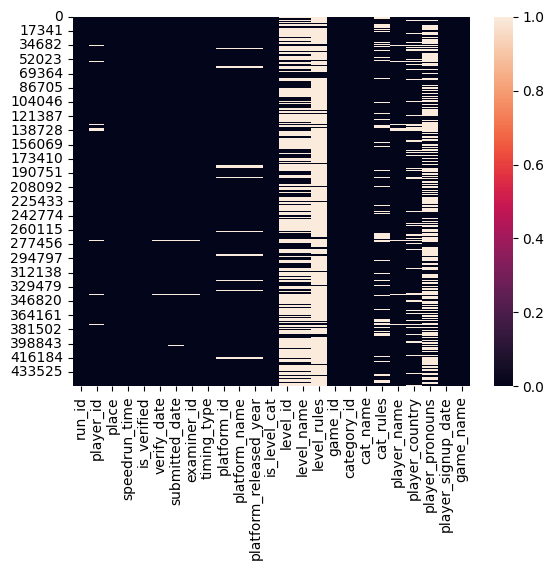

In [9]:

sns.heatmap(missing_val)
plt.show()

Sence the level_id, level_name, level_rules and player_pronouns have a lot of missing values i'm dropping them

In [10]:
cols_to_drop = ["level_id","level_name","level_rules","player_pronouns"]
speedrun_data =speedrun_data.drop(cols_to_drop, axis=1)

And then dropping the missing values. If i was to drop them with these columns still present that would remove too much data

In [11]:
speedrun_data.dropna(inplace=True)

Seeing how the dataset has been altererd

In [12]:
speedrun_data.describe(include=["float64","object"])

,run_id,player_id,speedrun_time,verify_date,submitted_date,examiner_id,timing_type,platform_id,platform_name,platform_released_year,game_id,category_id,cat_name,cat_rules,player_name,player_country,player_signup_date,game_name
count,313466,313466,313466.000000,313466,313466,313466,313466,313466,313466,313466.00000,313466,313466,313466,313466,313466,313466,313466,313466
unique,313466,123389,NaN,313030,312841,5493,3,67,67,NaN,244,2200,1729,2067,123389,245,123338,244
top,z0nr3l9m,qjod3zlx,NaN,2021-07-25 06:40:44,2021-07-25 07:24:42,qxkqvo9x,realtime,8gej2n93,PC,NaN,celeste,7dgr144k,Any%,## Individual Level Rules\r\n* All individual ...,nasuper,us,2018-11-30 08:41:44,Celeste
freq,1,300,NaN,6,8,3220,208607,164070,164070,NaN,8128,3526,39067,6141,300,115078,300,8128
mean,NaN,NaN,1353.818413,NaN,NaN,NaN,NaN,NaN,NaN,2697.16894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,4572.776733,NaN,NaN,NaN,NaN,NaN,NaN,2279.31852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.001000,NaN,NaN,NaN,NaN,NaN,NaN,1970.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,42.230000,NaN,NaN,NaN,NaN,NaN,NaN,1970.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,191.528000,NaN,NaN,NaN,NaN,NaN,NaN,1970.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,1048.000000,NaN,NaN,NaN,NaN,NaN,NaN,2012.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I notice that the minimum value in the in the speedrun_time column is 0.001000 seconds. That does not seem accurate so i will further investigate it

In [13]:
suspicious_rows = len(speedrun_data.loc[speedrun_data['speedrun_time'] <= 0.5])
print(suspicious_rows)

3667


There are indeed a great number of rows with this value. I'm removing them

In [14]:
threshold = 0.5

speedrun_data = speedrun_data[speedrun_data['speedrun_time'] > threshold]

<b id="duplicates">Checking for duplicates</b>

In [15]:
speedrun_data.duplicated().sum()

0

<b id="data-conversion">Data type conversion and Derived Column Creation</b>

In [16]:
speedrun_data.dtypes

run_id                     object
player_id                  object
place                       int64
speedrun_time             float64
is_verified                  bool
verify_date                object
submitted_date             object
examiner_id                object
timing_type                object
platform_id                object
platform_name              object
platform_released_year    float64
is_level_cat                 bool
game_id                    object
category_id                object
cat_name                   object
cat_rules                  object
player_name                object
player_country             object
player_signup_date         object
game_name                  object
dtype: object

Converting temporal values to datetime objects

In [17]:
speedrun_data['verify_date'] = pd.to_datetime(speedrun_data['verify_date'])
speedrun_data['submitted_date'] = pd.to_datetime(speedrun_data['submitted_date'])
speedrun_data['player_signup_date'] = pd.to_datetime(speedrun_data['player_signup_date'])

The speedrun time is also temporal but is also in seconds so i'm renaming it speedrun_time_seconds and creating a new column containg the time as a datetime object

In [18]:
speedrun_data = speedrun_data.rename(columns={'speedrun_time': 'speedrun_time_seconds'})

Creating a function that coverts an integer repesenting to a datetime object of hours minutes and seconds

In [19]:
def convert_seconds(seconds):

    hours, remainder = divmod(seconds, 3600)
    minutes, seconds = divmod(remainder, 60)

    time_str = f"{int(hours):02d}:{int(minutes):02d}"

    if seconds > 0:
        time_str += f":{int(seconds):02d}"

    return pd.to_datetime(time_str, format='%H:%M:%S', errors='coerce')

Adding the new column 

In [20]:
speedrun_data['speedrun_time'] = speedrun_data['speedrun_time_seconds'].apply(convert_seconds).dt.time

I also want to create a column for the year, mouth, day of the week a run was submitted

In [21]:
speedrun_data['submitted_year'] = speedrun_data['submitted_date'].dt.year
speedrun_data['submitted_month'] = speedrun_data['submitted_date'].dt.month_name()
speedrun_data['submitted_weekday'] = speedrun_data['submitted_date'].dt.day_name()

Seeing the altered dataset

In [22]:
speedrun_data.columns

Index(['run_id', 'player_id', 'place', 'speedrun_time_seconds', 'is_verified',
       'verify_date', 'submitted_date', 'examiner_id', 'timing_type',
       'platform_id', 'platform_name', 'platform_released_year',
       'is_level_cat', 'game_id', 'category_id', 'cat_name', 'cat_rules',
       'player_name', 'player_country', 'player_signup_date', 'game_name',
       'speedrun_time', 'submitted_year', 'submitted_month',
       'submitted_weekday'],
      dtype='object')

<h3 id="analysis">Data analysis</h3>

<b id="speedrunning-trends">Trends in speedrunning over time</b>

Has the number of speedruns sumbitted grown over the years?

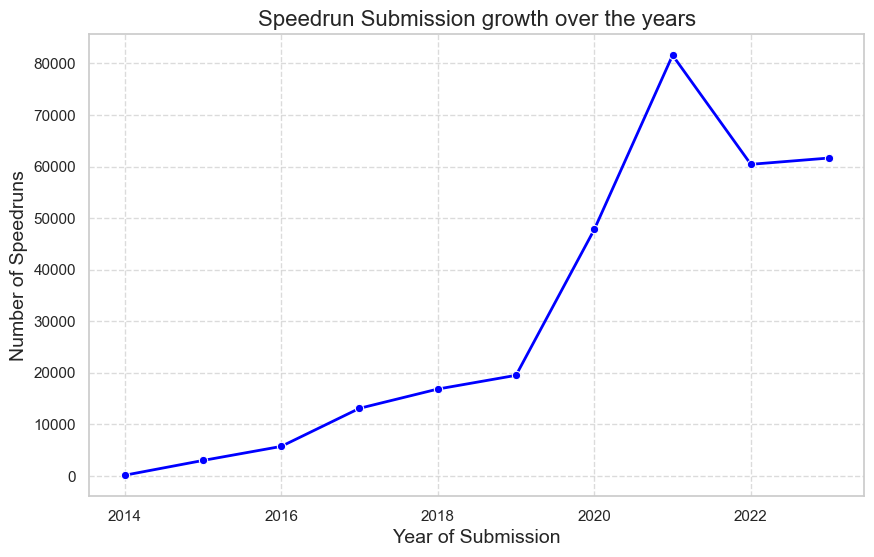

In [23]:
year_counts = speedrun_data["submitted_year"].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(data=year_counts, marker='o', color='blue', linewidth=2)


plt.xlabel('Year of Submission', fontsize=14)
plt.ylabel('Number of Speedruns', fontsize=14)
plt.title('Speedrun Submission growth over the years', fontsize=16)

plt.grid(True, linestyle='--', alpha=0.7)

What are the most common weekdays and mouths for speedrun submittion?

C:\Users\Andrei\AppData\Local\Temp\ipykernel_4488\334070815.py:6: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot(x=days_of_week_count.index, y=days_of_week_count.values, order=days_of_week_order,hue=days_of_week_count.index, palette=colors)


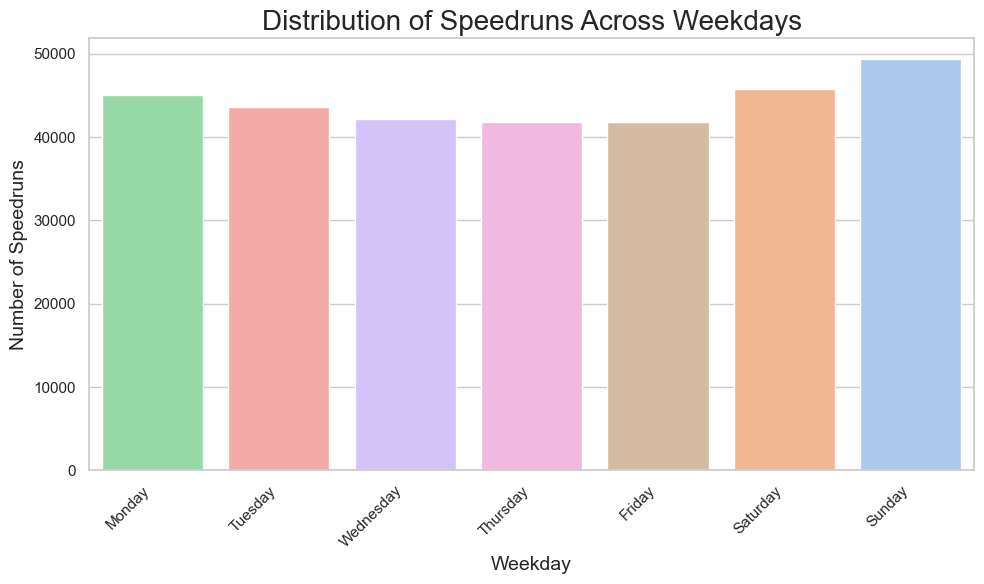

In [24]:
days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_of_week_count = speedrun_data["submitted_weekday"].value_counts()

plt.figure(figsize=(10, 6))
colors = sns.color_palette("pastel")
sns.barplot(x=days_of_week_count.index, y=days_of_week_count.values, order=days_of_week_order,hue=days_of_week_count.index, palette=colors)
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Speedruns Across Weekdays", size=20)
plt.xlabel("Weekday", fontsize=14)
plt.ylabel("Number of Speedruns", fontsize=14)

plt.tight_layout()
plt.show()

C:\Users\Andrei\AppData\Local\Temp\ipykernel_4488\3833034256.py:6: UserWarning: 
The palette list has fewer values (10) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=months_count.index, y=months_count.values, order=months_order, hue=months_count, palette=colors,legend=False)


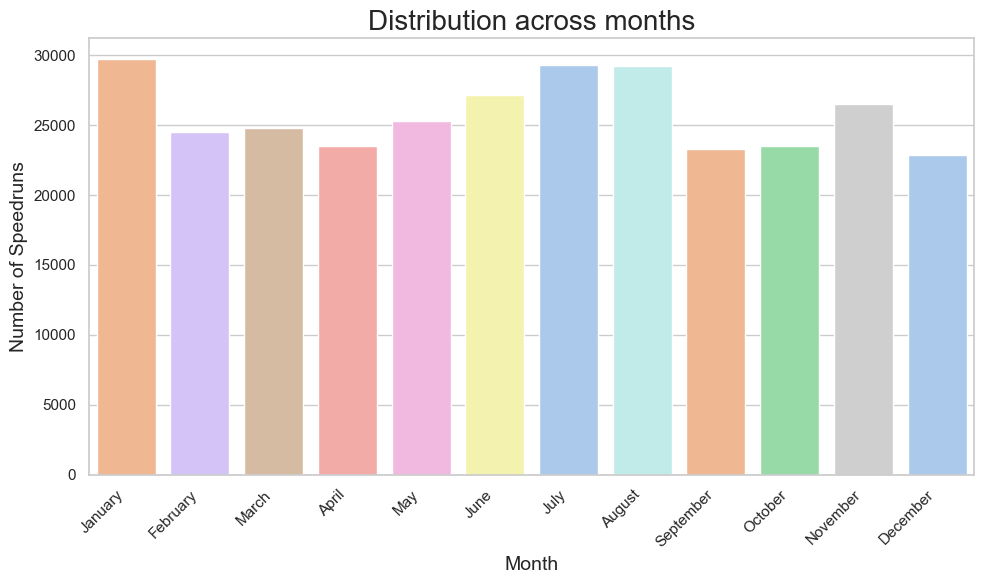

In [25]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_count = speedrun_data["submitted_month"].value_counts()

plt.figure(figsize=(10, 6))
colors = sns.color_palette("pastel")
sns.barplot(x=months_count.index, y=months_count.values, order=months_order, hue=months_count, palette=colors,legend=False)
plt.xticks(rotation=45, ha="right")
plt.title("Distribution across months", size=20)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Speedruns", fontsize=14)

plt.tight_layout()
plt.show()


<b>Games and Platforms</b>

What are the top platforms based on player performance

In [26]:
grouped_platforms = speedrun_data.groupby('platform_name')["speedrun_time_seconds"].mean().sort_values()
top_platforms = grouped_platforms.head(10)
print(top_platforms)

platform_name
Windows Phone            14.179200
Game Boy Advance         34.500000
Flash                    37.985695
Nintendo Switch Lite     39.564615
Arcade                   94.209556
Google Stadia           156.777438
Oculus VR               163.333250
iOS                     205.436381
Android                 209.028648
Web                     228.531309
Name: speedrun_time_seconds, dtype: float64


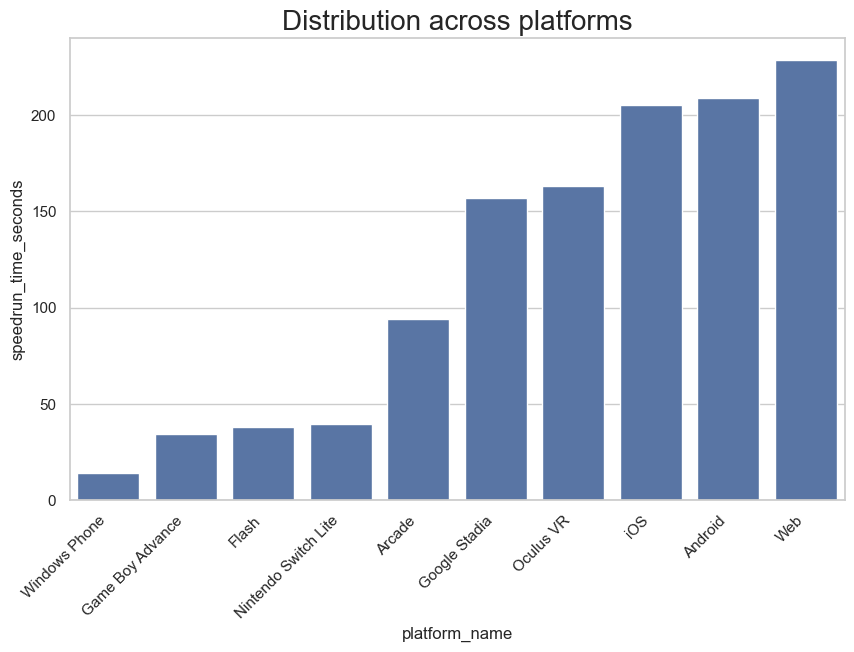

In [27]:
top_platforms_df = top_platforms.to_frame()

plt.figure(figsize=(10, 6))
sns.barplot(x='platform_name', y='speedrun_time_seconds', data=top_platforms_df)
plt.xticks(rotation=45, ha="right")
plt.title("Distribution across platforms", size=20)
plt.show()


How does the avg speedrun_time for top games vary across different platforms?

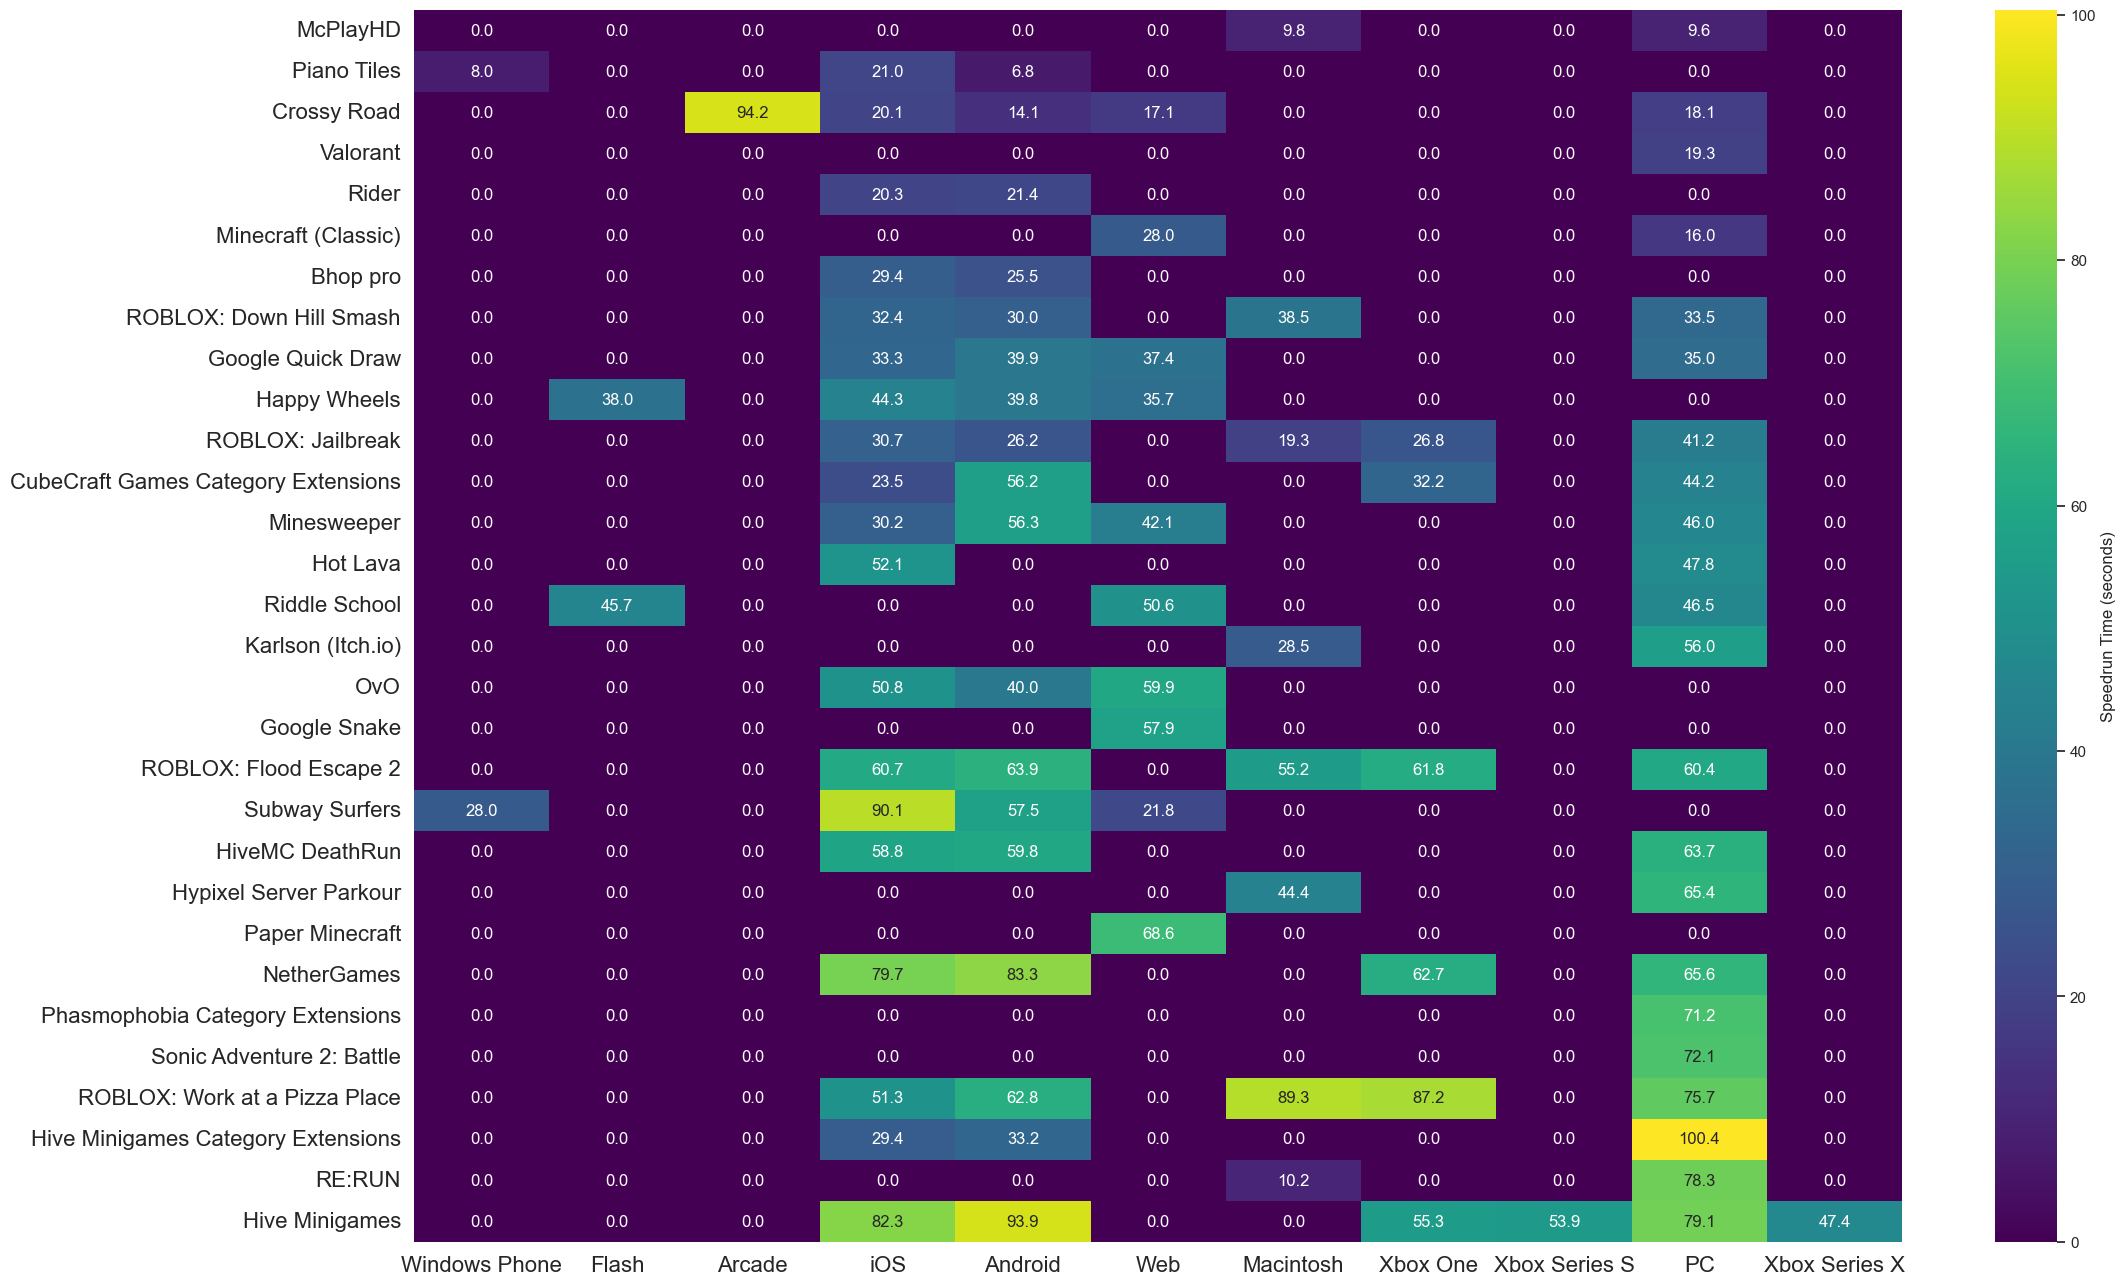

In [28]:
top_30_platforms = grouped_platforms.head(30)
grouped_games = speedrun_data.groupby('game_name')["speedrun_time_seconds"].mean().sort_values()
top_30_games = grouped_games.head(30)

games_matrix = speedrun_data.pivot_table(index='game_name', columns='platform_name', values='speedrun_time_seconds', aggfunc='mean')
games_matrix = games_matrix.loc[top_30_games.index, top_30_platforms.index].fillna(0.0)

games_matrix = games_matrix.loc[(games_matrix != 0).any(axis=1), (games_matrix != 0).any(axis=0)]

plt.figure(figsize=(24, 16))
heatmap = sns.heatmap(games_matrix, annot=True, fmt='.1f', cmap='viridis', cbar_kws={'label': 'Speedrun Time (seconds)'})

ax = heatmap.axes

ax.tick_params(axis='both', which='both', labelsize=16)


ax.set_xlabel('')
ax.set_ylabel('')

plt.show()

How does the distribution of speedrun times vary across different categories?

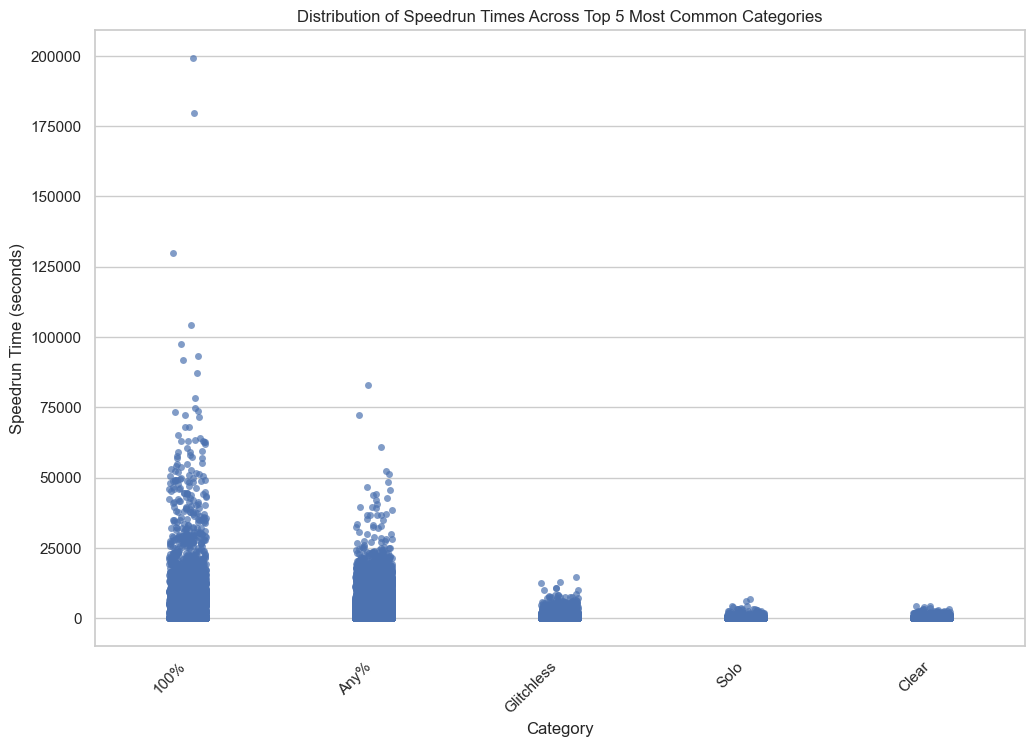

In [29]:

top_categories = speedrun_data['cat_name'].value_counts().nlargest(5).index

filtered_data = speedrun_data[speedrun_data['cat_name'].isin(top_categories)]

plt.figure(figsize=(12, 8))
sns.stripplot(x='cat_name', y='speedrun_time_seconds', data=filtered_data, jitter=True, alpha=0.7)
plt.title('Distribution of Speedrun Times Across Top 5 Most Common Categories')
plt.xlabel('Category')
plt.ylabel('Speedrun Time (seconds)')
plt.xticks(rotation=45, ha='right') 
plt.show()
